## Runing Sensitivity and uncertainty analysis in UTOPIA using the monaco Monte Carlo framework 
#### (https://monaco.readthedocs.io/en/latest/)

### Import the necessary libraries

In [1]:
from utopia.monte_carlo.montecarlo_analysis import run_mc_analysis
from utopia.utopia import utopiaModel
import numpy as np
import scipy.stats as st

c:\Users\PradoDomercq\AppData\Local\miniconda3\envs\utopia_env\lib\site-packages\monaco\dvars_sensitivity.py:18: UserWarning: Consider installing numba for better performance
  warn("Consider installing numba for better performance", UserWarning)


### Load the default configuration and data from the 'data' folder.


In [2]:
data_data = utopiaModel.load_json_file("data/default_data.json")
config_data = utopiaModel.load_json_file("data/default_config.json")


### Define the parameter distributions for the Monte Carlo simulation.


In [3]:
# Define the parameters that you want to sample from the input parameters included on the data loaded from the default data file and select a distribution for each parameter.
param_distributions = {
    "MPdensity_kg_m3": ("lognorm", {"s": 0.05, "scale": np.exp(np.log(data_data["MPdensity_kg_m3"]) - (0.05**2) / 2)}),
    "FI": ("uniform", {"loc": 0.0, "scale": 1.0}),
    "t_half_deg_free": ("lognorm", {"s": 0.05, "scale": np.exp(np.log(data_data["t_half_deg_free"]) - (0.05**2) / 2)}),
    "t_frag_gen_FreeSurfaceWater": ("lognorm", {"s": 0.05, "scale": np.exp(np.log(data_data["t_frag_gen_FreeSurfaceWater"]) - (0.05**2) / 2)})
}

In [4]:
# Run the Monte Carlo analysis with the specified parameters distributions and number of cases.

sim= run_mc_analysis(
    base_config=config_data,
    base_data=data_data,
    n_cases=100,
    param_distributions=param_distributions
)



Running 'UTOPIA_MC_simulation' Monte Carlo simulation with 100/100 cases...
Drawing random samples for 4 input variables via the 'sobol_random' method... Done
Generating cases... Done


Running cases:   0%|          | 0/100 [00:00<?, ? cases/s]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:   1%|          | 1/100 [00:02<04:43,  2.87s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:   2%|▏         | 2/100 [00:05<04:37,  2.83s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:   3%|▎         | 3/100 [00:08<04:38,  2.88s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:   4%|▍         | 4/100 [00:11<04:33,  2.85s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:   5%|▌         | 5/100 [00:14<04:38,  2.93s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:   6%|▌         | 6/100 [00:17<04:29,  2.87s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:   7%|▋         | 7/100 [00:20<04:24,  2.85s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:   8%|▊         | 8/100 [00:22<04:20,  2.83s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:   9%|▉         | 9/100 [00:25<04:18,  2.84s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  10%|█         | 10/100 [00:28<04:19,  2.88s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  11%|█         | 11/100 [00:31<04:17,  2.89s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  12%|█▏        | 12/100 [00:34<04:24,  3.01s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  13%|█▎        | 13/100 [00:38<04:37,  3.19s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  14%|█▍        | 14/100 [00:41<04:32,  3.17s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  15%|█▌        | 15/100 [00:44<04:21,  3.07s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  16%|█▌        | 16/100 [00:47<04:08,  2.95s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  17%|█▋        | 17/100 [00:49<03:57,  2.86s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  18%|█▊        | 18/100 [00:52<03:49,  2.79s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  19%|█▉        | 19/100 [00:55<03:46,  2.80s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  20%|██        | 20/100 [00:57<03:42,  2.79s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  21%|██        | 21/100 [01:00<03:32,  2.70s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  22%|██▏       | 22/100 [01:03<03:32,  2.72s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  23%|██▎       | 23/100 [01:05<03:29,  2.73s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  24%|██▍       | 24/100 [01:08<03:22,  2.67s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  25%|██▌       | 25/100 [01:11<03:19,  2.65s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  26%|██▌       | 26/100 [01:13<03:16,  2.66s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  27%|██▋       | 27/100 [01:16<03:15,  2.68s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  28%|██▊       | 28/100 [01:18<03:06,  2.60s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  29%|██▉       | 29/100 [01:21<03:08,  2.65s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  30%|███       | 30/100 [01:24<03:17,  2.82s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  31%|███       | 31/100 [01:28<03:25,  2.98s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  32%|███▏      | 32/100 [01:31<03:33,  3.14s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  33%|███▎      | 33/100 [01:35<03:34,  3.20s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  34%|███▍      | 34/100 [01:37<03:20,  3.04s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  35%|███▌      | 35/100 [01:40<03:11,  2.94s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  36%|███▌      | 36/100 [01:43<03:03,  2.86s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  37%|███▋      | 37/100 [01:45<02:56,  2.80s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  38%|███▊      | 38/100 [01:48<02:52,  2.78s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  39%|███▉      | 39/100 [01:51<02:43,  2.68s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  40%|████      | 40/100 [01:53<02:41,  2.70s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  41%|████      | 41/100 [01:56<02:33,  2.60s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  42%|████▏     | 42/100 [01:58<02:26,  2.53s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  43%|████▎     | 43/100 [02:01<02:24,  2.53s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  44%|████▍     | 44/100 [02:03<02:24,  2.59s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  45%|████▌     | 45/100 [02:06<02:22,  2.59s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  46%|████▌     | 46/100 [02:08<02:20,  2.60s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  47%|████▋     | 47/100 [02:11<02:20,  2.66s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  48%|████▊     | 48/100 [02:14<02:17,  2.64s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  49%|████▉     | 49/100 [02:17<02:16,  2.67s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  50%|█████     | 50/100 [02:19<02:09,  2.59s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  51%|█████     | 51/100 [02:22<02:08,  2.62s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  52%|█████▏    | 52/100 [02:24<02:06,  2.64s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  53%|█████▎    | 53/100 [02:27<02:03,  2.63s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  54%|█████▍    | 54/100 [02:30<02:01,  2.64s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  55%|█████▌    | 55/100 [02:32<02:00,  2.67s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  56%|█████▌    | 56/100 [02:36<02:08,  2.92s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  57%|█████▋    | 57/100 [02:39<02:06,  2.93s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  58%|█████▊    | 58/100 [02:41<01:57,  2.80s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  59%|█████▉    | 59/100 [02:44<01:52,  2.75s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  60%|██████    | 60/100 [02:47<01:49,  2.74s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  61%|██████    | 61/100 [02:50<01:54,  2.93s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  62%|██████▏   | 62/100 [02:53<01:50,  2.92s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  63%|██████▎   | 63/100 [02:55<01:43,  2.80s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  64%|██████▍   | 64/100 [02:58<01:40,  2.79s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  65%|██████▌   | 65/100 [03:01<01:36,  2.75s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  66%|██████▌   | 66/100 [03:04<01:32,  2.71s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  67%|██████▋   | 67/100 [03:06<01:29,  2.71s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  68%|██████▊   | 68/100 [03:09<01:25,  2.69s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  69%|██████▉   | 69/100 [03:11<01:22,  2.65s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  70%|███████   | 70/100 [03:14<01:20,  2.70s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  71%|███████   | 71/100 [03:17<01:16,  2.63s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  72%|███████▏  | 72/100 [03:19<01:12,  2.60s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  73%|███████▎  | 73/100 [03:22<01:11,  2.65s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  74%|███████▍  | 74/100 [03:25<01:09,  2.68s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  75%|███████▌  | 75/100 [03:28<01:13,  2.93s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  76%|███████▌  | 76/100 [03:31<01:11,  2.99s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  77%|███████▋  | 77/100 [03:34<01:08,  2.97s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  78%|███████▊  | 78/100 [03:37<01:03,  2.88s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  79%|███████▉  | 79/100 [03:39<00:57,  2.76s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  80%|████████  | 80/100 [03:42<00:54,  2.70s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  81%|████████  | 81/100 [03:45<00:51,  2.71s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  82%|████████▏ | 82/100 [03:47<00:48,  2.70s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  83%|████████▎ | 83/100 [03:50<00:46,  2.76s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  84%|████████▍ | 84/100 [03:53<00:42,  2.67s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  85%|████████▌ | 85/100 [03:56<00:40,  2.70s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  86%|████████▌ | 86/100 [03:58<00:38,  2.74s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  87%|████████▋ | 87/100 [04:01<00:35,  2.73s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  88%|████████▊ | 88/100 [04:04<00:32,  2.74s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  89%|████████▉ | 89/100 [04:06<00:29,  2.70s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  90%|█████████ | 90/100 [04:09<00:26,  2.69s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  91%|█████████ | 91/100 [04:12<00:24,  2.71s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  92%|█████████▏| 92/100 [04:15<00:21,  2.74s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  93%|█████████▎| 93/100 [04:18<00:19,  2.78s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  94%|█████████▍| 94/100 [04:20<00:16,  2.80s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  95%|█████████▌| 95/100 [04:23<00:13,  2.75s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  96%|█████████▌| 96/100 [04:26<00:11,  2.81s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  97%|█████████▋| 97/100 [04:29<00:08,  2.79s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  98%|█████████▊| 98/100 [04:31<00:05,  2.72s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Running cases:  99%|█████████▉| 99/100 [04:34<00:02,  2.67s/ cases]

Running UTOPIA model with configured parameters...
Generated model objects.
Generated rate constants for model particles.
Built matrix of interactions.
Solved system of ODEs for steady state.


Postprocessing cases: 100%|██████████| 100/100 [00:00<00:00, 30023.65 cases/s]

Simulation complete! Runtime: 0:04:37.503825


### Optional: Export the output variables from the simulation to a file.


In [6]:

import os

output_dir = "UTOPIA_MC_simulation_results"
if not os.path.exists(output_dir):
	os.makedirs(output_dir)

sim.exportOutVars()

Exporting InVar draws to file...
OutVar nums saved in 'UTOPIA_MC_simulation_outvarnums.json'


### Plot sensitivity indices for each output variable.  Monaco uses the D-VARS approach to calculating global sensitivity indices.

In [15]:
sim.outvars

{'residence_time_mass': <monaco.mc_var.OutVar at 0x1b5b6ce4fd0>,
 'residence_time_number': <monaco.mc_var.OutVar at 0x1b5b8fd2580>,
 'persistence_mass': <monaco.mc_var.OutVar at 0x1b5b6ae1c10>,
 'persistence_number': <monaco.mc_var.OutVar at 0x1b5b6e6ed30>,
 'C_g_m3_Ocean_Surface_Water': <monaco.mc_var.OutVar at 0x1b5fcaaa8e0>}

Calculating sensitivity indices for 'C_g_m3_Ocean_Surface_Water'...
Calculating optimal hyperparameters Φ for 'C_g_m3_Ocean_Surface_Water' covariances...
Done calculating optimal hyperparameters.
Done calculating sensitivity indices.


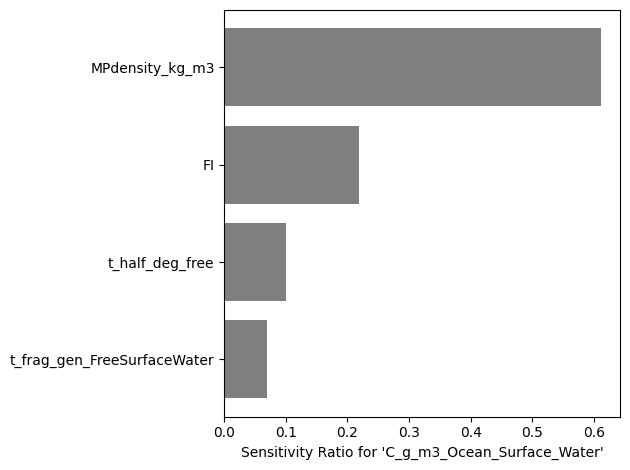

In [16]:
sim.calcSensitivities("C_g_m3_Ocean_Surface_Water")
fig, ax = sim.outvars["C_g_m3_Ocean_Surface_Water"].plotSensitivities()

Calculating sensitivity indices for 'persistence_number'...
Calculating optimal hyperparameters Φ for 'persistence_number' covariances...
Done calculating optimal hyperparameters.
Done calculating sensitivity indices.


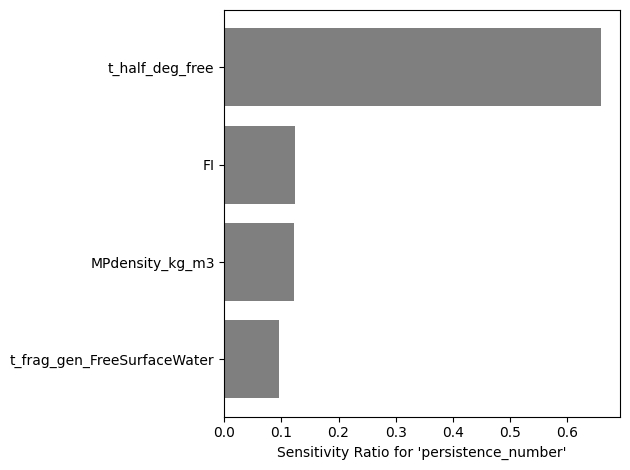

In [21]:
sim.calcSensitivities("persistence_number")
fig, ax = sim.outvars["persistence_number"].plotSensitivities()

Variable: residence_time_mass
Calculating sensitivity indices for 'residence_time_mass'...
Calculating optimal hyperparameters Φ for 'residence_time_mass' covariances...
Done calculating optimal hyperparameters.
Done calculating sensitivity indices.


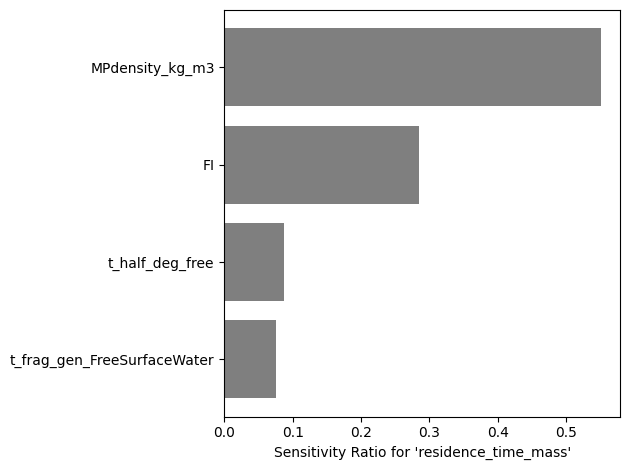

Variable: residence_time_number
Calculating sensitivity indices for 'residence_time_number'...
Calculating optimal hyperparameters Φ for 'residence_time_number' covariances...


LinAlgError: Singular matrix

In [ ]:
import matplotlib.pyplot as plt

for var in sim.outvars:
    print(f"Variable: {var}")
    sim.calcSensitivities(var)
    fig, ax = sim.outvars[var].plotSensitivities()

    plt.show()

### Plot 

(<Figure size 640x480 with 3 Axes>,
 (<Axes: xlabel='MPdensity_kg_m3'>,
  <Axes: ylabel='residence_time_number'>,
  <Axes: >))

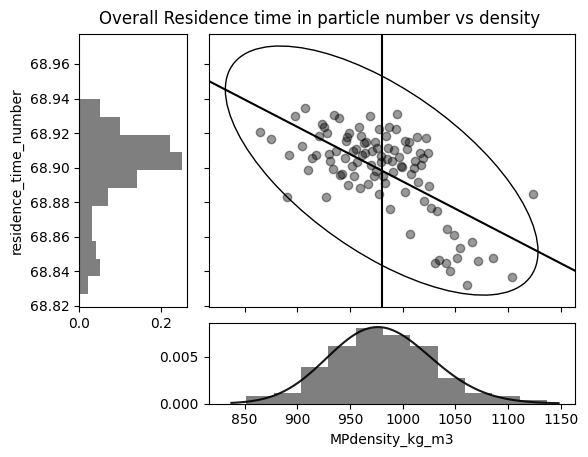

In [19]:
import monaco as mc

mc.multi_plot([sim.invars["MPdensity_kg_m3"],sim.outvars["residence_time_number"]],title="Overall Residence time in particle number vs density",cov_plot=True)

(<Figure size 640x480 with 3 Axes>,
 (<Axes: xlabel='MPdensity_kg_m3'>,
  <Axes: ylabel='C_g_m3_Ocean_Surface_Water'>,
  <Axes: >))

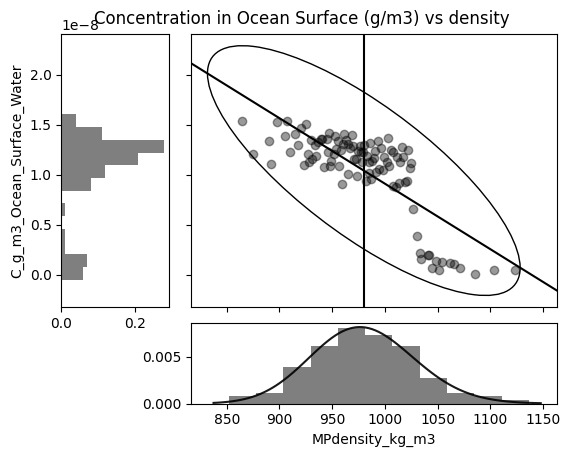

In [12]:

mc.multi_plot([sim.invars["MPdensity_kg_m3"],sim.outvars["C_g_m3_Ocean_Surface_Water"]],title="Concentration in Ocean Surface (g/m3) vs density",cov_plot=True)